<a href="https://colab.research.google.com/github/Lourdhu-karthik/portfolio-site19/blob/main/wall_mart_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# retail analasys with wallmart data
Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Analysis Tasks:

Basic Statistics tasks:

Which store has maximum sales

Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

Which store/s has good quarterly growth rate in Q3’2012

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Provide a monthly and semester view of sales in units and give insights

Statistical Model

For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Select the model which gives best accuracy

In [ ]:
#first lets import all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load the dataset
stores_data=pd.read_csv('Walmart_Store_sales.csv')
stores_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
#lets check is there any null values in the data
stores_data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
# to predict this(Which store has maximum sales), we need to group the weekly_sales by each Store and add all weeks data to each store
combined_store_sales=stores_data.groupby('Store')['Weekly_Sales'].sum() #as group by only generate series(tuples of sales to each store)
combined_store_sales.head()                                      #we need to sum tuple of sales to each store

Store
1    2.224028e+08
2    2.753824e+08
3    5.758674e+07
4    2.995440e+08
5    4.547569e+07
Name: Weekly_Sales, dtype: float64

In [ ]:
print('store number:',combined_store_sales.idxmax()) #id max shows store_id or number
print('highest sales:',combined_store_sales.max())# max shows max sales numbers

store number: 20
highest sales: 301397792.46


In [ ]:
#which store has max standard deviation, variance and coefficient of mean/std
stats_store=stores_data.groupby('Store')['Weekly_Sales'].agg(['mean','std','var'])
print('max mean store is:',stats_store['mean'].idxmax())
print('max mean is:',stats_store['mean'].max())
print('max standard deviation store is:',stats_store['std'].idxmax())
print('max standard deviation is:',stats_store['std'].max())

max mean store is: 20
max mean is: 2107676.8703496503
max standard deviation store is: 14
max standard deviation is: 317569.9494755081


In [ ]:
store_var=stores_data.groupby('Store')['Weekly_Sales'].sum()
print("whole stores variance:",store_var.var())
store_var_bystore=stores_data.groupby('Store')['Weekly_Sales'].var()
print('store with high variance:',store_var_bystore.idxmax())
print('high variance stores variance is:',store_var_bystore.max())

whole stores variance: 6110166888006653.0
store with high variance: 14
high variance stores variance is: 100850672809.87677


In [ ]:
#coefficient of mean to standard deviations
stores_coeff = stats_store['mean']/stats_store['std']
print('store with highest coefficient is:',stores_coeff.idxmax())
print('highest coefficient is:',stores_coeff.max())

store with highest coefficient is: 37
highest coefficient is: 23.76193264602112


In [ ]:
weeks=stores_data.groupby('Date')

In [ ]:
weeks['Date'].count()

Date
01-04-2011    45
01-06-2012    45
01-07-2011    45
01-10-2010    45
02-03-2012    45
              ..
30-07-2010    45
30-09-2011    45
30-12-2011    45
31-08-2012    45
31-12-2010    45
Name: Date, Length: 143, dtype: int64

In [ ]:
stores_data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [ ]:
#Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
#step:1 finding non holiday sales mean
non_holidays=stores_data[stores_data['Holiday_Flag']==0]
NonHoliday_WS_mean=non_holidays['Weekly_Sales'].mean()
NonHoliday_WS_mean

1041256.3802088564

In [ ]:
#step 2 finding holidays and comparing them with non holiday sales mean
holiday_sales=stores_data[stores_data['Holiday_Flag']==1]
high_holiday_sales=holiday_sales[holiday_sales['Weekly_Sales']>NonHoliday_WS_mean]
print('holiday sales that are grater than non holiday mean sales are:\n\n',high_holiday_sales[['Store','Date','Weekly_Sales','Holiday_Flag']])

holiday sales that are grater than non holiday mean sales are:

       Store        Date  Weekly_Sales  Holiday_Flag
1         1  12-02-2010    1641957.44             1
31        1  10-09-2010    1507460.69             1
42        1  26-11-2010    1955624.11             1
47        1  31-12-2010    1367320.01             1
53        1  11-02-2011    1649614.93             1
...     ...         ...           ...           ...
5819     41  30-12-2011    1264014.16             1
5825     41  10-02-2012    1238844.56             1
5855     41  07-09-2012    1392143.82             1
6334     45  26-11-2010    1182500.16             1
6386     45  25-11-2011    1170672.94             1

[220 rows x 4 columns]


In [ ]:
#for applying datetime related functions for our requirements lets convert the data in to date time format
stores_data['Date']=pd.to_datetime(stores_data['Date'])
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
#function for quarterly growth rate for q3 in 2012
def calc_growth(stores_data):
    q3_2012 = stores_data[(stores_data['Date'].dt.year == 2012) & (stores_data['Date'].dt.quarter == 3)]['Weekly_Sales'].sum()
    q2_2012 = stores_data[(stores_data['Date'].dt.year == 2012) & (stores_data['Date'].dt.quarter == 2)]['Weekly_Sales'].sum()
    return (q3_2012 - q2_2012) / q2_2012 * 100

In [ ]:
quarterly_growth = stores_data.groupby('Store').apply(calc_growth) #we can see that q3 growth rate is decreased by 9.91% which is so closer to 10%
print(quarterly_growth)

Store
1    -11.426342
2    -10.716535
3    -10.717379
4     -9.625310
5    -12.347142
6    -11.518899
7     -3.824738
8     -8.885460
9    -12.152357
10   -10.293384
11    -9.982231
12   -10.731580
13    -9.264673
14   -17.551086
15   -12.183321
16    -2.789294
17   -10.719910
18    -9.593152
19    -9.123188
20   -10.469051
21    -8.917697
22   -11.332535
23    -6.452678
24    -9.242314
25   -10.143607
26    -6.057624
27   -10.633092
28   -11.364302
29   -12.888364
30   -10.444624
31    -9.835123
32    -8.258527
33    -9.540218
34   -10.746352
35    -4.663086
36   -12.523420
37    -8.881539
38   -10.520358
39    -6.396875
40    -9.354939
41    -6.756521
42   -10.217957
43   -10.474373
44    -6.988212
45   -13.889207
dtype: float64


In [ ]:
#it returned empty series 1d array coz there is no store that generates profits in sales compared to last quarter (q2)
#that means there is no store that generates profits in this quarter(q3) compared to previous quarter(q2)



good_growth_stores = quarterly_growth[quarterly_growth > 1]
s = pd.Series([],dtype='float64')
if good_growth_stores.equals(s):
    print( 'there is no positive growth in stores in Quarter 3 compared to Previous Quarter')

there is no positive growth in stores in Quarter 3 compared to Previous Quarter


In [ ]:
# Monthly and Semester View of Sales
monthly_sales =stores_data.resample('M', on='Date')['Weekly_Sales'].sum()  #for monthlu sales


In [ ]:
def resample_by_semester_alt(stores_data):

  semester_data = stores_data.groupby([stores_data['Date'].dt.year, lambda x: (x // 6) + 1])['Weekly_Sales'].sum()
  semester_data.name =  'Weekly_Sales' # Set a name for the result Series
  return semester_data.to_frame().reset_index()

semester_sales = resample_by_semester_alt(stores_data.copy())

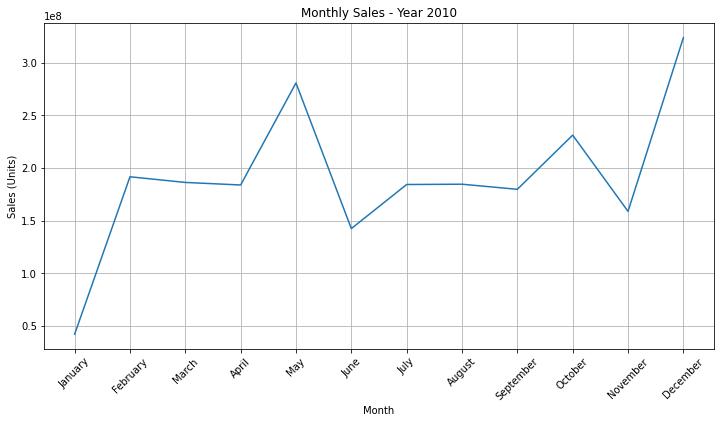

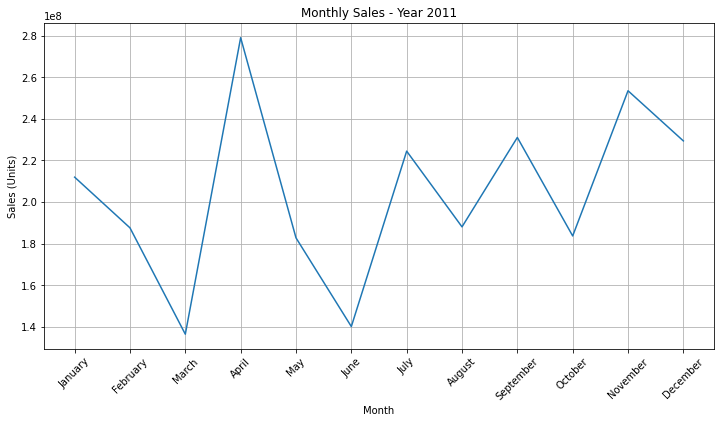

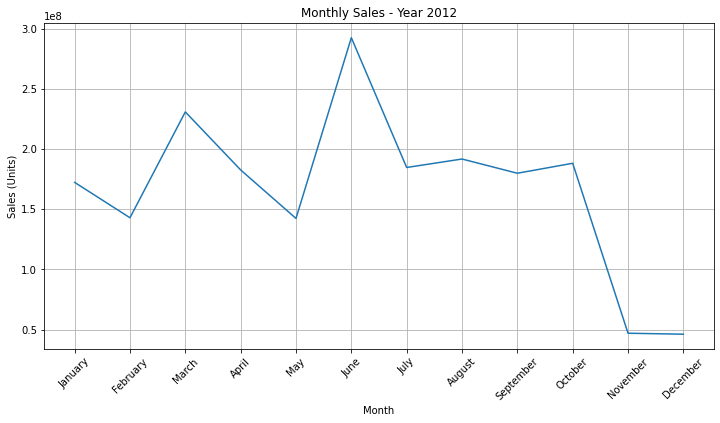

In [ ]:
#month wise sales mapping for Each year

monthly_sales_by_year = monthly_sales.groupby(monthly_sales.index.year)

# Function to plot monthly sales for a single year
def plot_monthly_sales(year, data):
  plt.figure(figsize=(12, 6))
  plt.plot(data.index.month_name(), data.values)
  plt.xlabel('Month')
  plt.ylabel('Sales (Units)')
  plt.title(f'Monthly Sales - Year {year}')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()

# Iterate through each year and plot monthly sales
for year, data in monthly_sales_by_year:
  plot_monthly_sales(year, data)

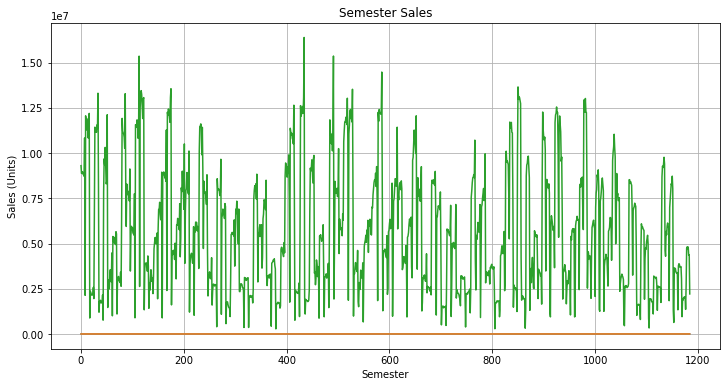

In [ ]:
# sem wise sales
plt.figure(figsize=(12, 6))
plt.plot(semester_sales.index, semester_sales.values)
plt.xlabel('Semester')
plt.ylabel('Sales (Units)')
plt.title('Semester Sales')
plt.xticks(rotation=0)  # No rotation for semester labels
plt.grid(True)
plt.show()

we plotted diffrent graphs for getting INSIGHTS or the performance of stores month and semister wise
   ------------- END OF BASIC STATISTIC TASKS -------------

# Task 2: statistical predicting models

In [ ]:
#statistical models

stat_m_data=pd.read_csv("Walmart_Store_sales.csv")
print(stat_m_data.head())
stat_m_data.info()

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   i

In [ ]:
#to build prediction model for store 1, lets get store 1 data
store_1=stat_m_data[stat_m_data["Store"]==1]
store_1.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
#Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order).
#convert the date data type as datetime
 #to overcome settingwithcopywarning creaty an copy
store_1c=store_1.copy()
import datetime
store_1c['Date']=[datetime.datetime.strptime(date, "%d-%m-%Y") for date in store_1c['Date']]#sort the dates in to order


In [ ]:
store_1c['days'] = range(1, len(store_1c['Date']) + 1)#creating days representing date

In [ ]:
store_1c.head(143)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,days
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,3
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5
...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,139
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573,140
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573,141
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,142


In [ ]:
#after a lot of failed trailes i realised that linear regression wont work with timedate data types,lets convert or eliminate date column
#so lets slice the data
 #Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
store_lr=store_1c.drop(['Store','Date'],axis=1)


In [ ]:
store_lr=store_lr.reindex(['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','days','Weekly_Sales'],axis=1)

In [ ]:
store_lr.head()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,days,Weekly_Sales
0,0,42.31,2.572,211.096358,8.106,1,1643690.90
1,1,38.51,2.548,211.242170,8.106,2,1641957.44
2,0,39.93,2.514,211.289143,8.106,3,1611968.17
3,0,46.63,2.561,211.319643,8.106,4,1409727.59
4,0,46.50,2.625,211.350143,8.106,5,1554806.68


In [ ]:
X=store_lr.iloc[:, :-1]
y=store_lr.iloc[:,-1]

In [ ]:
#split the data to test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#apply liner regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
lr=LinearRegression()
rf_model = RandomForestRegressor()
logistic_model = LogisticRegression()
svr_model = SVR()
dt_regressor = DecisionTreeRegressor()

In [ ]:
lr.fit(X_train,y_train)
rf_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=lr.predict(X_test)
rf_pred = rf_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)
y_pred_dt = dt_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
svr_mse=mean_squared_error(y_test, y_pred_svr)
svr_r2= r2_score(y_test,  y_pred_svr)
dt_mse=mean_squared_error(y_test, y_pred_dt)
dt_r2= r2_score(y_test, y_pred_dt)

print("Mean Squared Error of linear regression:",lr_mse)
print("R-squared of linear regression:",lr_r2)
print("Mean Squared Error of random forest:",rf_mse)
print("R-squared of random forest:",rf_r2)
print("Mean Squared Error of svr:",svr_mse)
print("R-squared of svr:",svr_r2)
print("Mean Squared Error of decission tree:",dt_mse)
print("R-squared of decission tree:",dt_r2)

Mean Squared Error of linear regression: 21781646253.036354
R-squared of linear regression: 0.14586388105553416
Mean Squared Error of random forest: 14175976763.41711
R-squared of random forest: 0.4441093370863032
Mean Squared Error of svr: 31855718855.220657
R-squared of svr: -0.24917647422500355
Mean Squared Error of decission tree: 32969516922.06415
R-squared of decission tree: -0.29285247313940754


 from the above results we can say that linear regression is not best fit to my data, and its predictions are worse

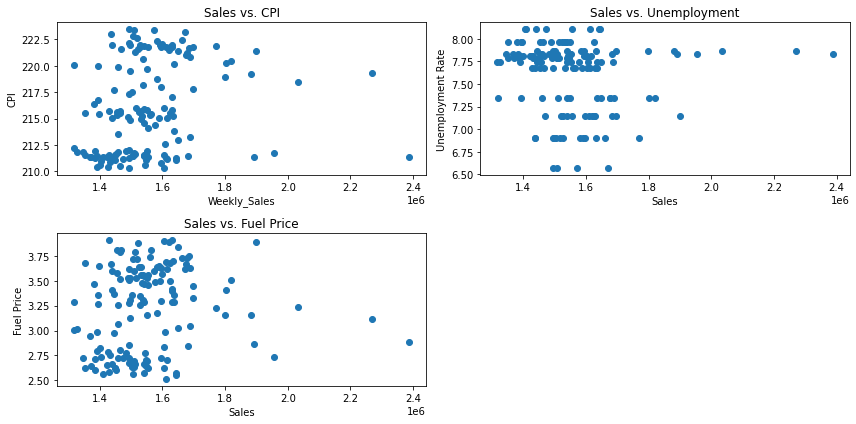

In [ ]:
# Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
# Visualize relationships
plt.figure(figsize=(12, 6))

# Scatter plot - Sales vs. CPI
plt.subplot(2, 2, 1)
plt.scatter(store_lr['Weekly_Sales'], store_lr['CPI'])
plt.xlabel('Weekly_Sales')
plt.ylabel('CPI')
plt.title('Sales vs. CPI')
# Scatter plot - Sales vs. Unemployment
plt.subplot(2, 2, 2)
plt.scatter(store_lr['Weekly_Sales'], store_lr['Unemployment'])
plt.xlabel('Sales')
plt.ylabel('Unemployment Rate')
plt.title('Sales vs. Unemployment')
# Scatter plot - Sales vs. Fuel Price
plt.subplot(2, 2, 3)
plt.scatter(store_lr['Weekly_Sales'], store_lr['Fuel_Price'])
plt.xlabel('Sales')
plt.ylabel('Fuel Price')
plt.title('Sales vs. Fuel Price')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate correlation coefficients
correlations = store_lr[['Weekly_Sales', 'CPI', 'Unemployment', 'Fuel_Price']].corr()
print(correlations)


              Weekly_Sales       CPI  Unemployment  Fuel_Price
Weekly_Sales      1.000000  0.225408     -0.097955    0.124592
CPI               0.225408  1.000000     -0.813471    0.755259
Unemployment     -0.097955 -0.813471      1.000000   -0.513944
Fuel_Price        0.124592  0.755259     -0.513944    1.000000


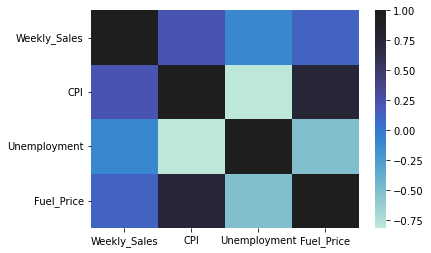

In [ ]:
sns.heatmap(correlations,center=True)
plt.show()


R-squared of random forest: 0.34244905368884626
Mean Squared Error of svr: 31855718855.220657
Mean Squared Error of decission tree: 37006672831.61966
R-squared of decission tree: -0.4511637706466276

 according to above results random forest is the best fit for my model
 as it produces best results


# our project(retail analasys with wallmart data)  has been done as per requirements
## we break downed each task in to sub tasks when needed, and
## tasks are done step by step for better understanding
# thank you for your interest